In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv('Cleaned_Alzheimers.csv')
df

C:\Users\wrnaf\AppData\Local\Temp\ipykernel_8696\3937186043.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Result,Gender,Age,Education_yrs,Social Status,Mental State Exam,Dementated Severity,Intracranial Volume,Brain Volume,Atlas Scaling Factor,0.0,0.5,1.0,2.0
0,0,0,87,14,2.000000,27.0,0.0,1987,0.696,0.883,True,False,False,False
1,0,0,88,14,2.000000,30.0,0.0,2004,0.681,0.876,True,False,False,False
2,1,0,75,12,2.460452,23.0,0.5,1678,0.736,1.046,False,True,False,False
3,1,0,76,12,2.460452,28.0,0.5,1738,0.713,1.010,False,True,False,False
4,1,0,80,12,2.460452,22.0,0.5,1698,0.701,1.034,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,1,0,82,16,1.000000,28.0,0.5,1693,0.694,1.037,False,True,False,False
369,1,0,86,16,1.000000,26.0,0.5,1688,0.675,1.040,False,True,False,False
370,0,1,61,13,2.000000,30.0,0.0,1319,0.801,1.331,True,False,False,False
371,0,1,63,13,2.000000,30.0,0.0,1327,0.796,1.323,True,False,False,False


<Axes: >

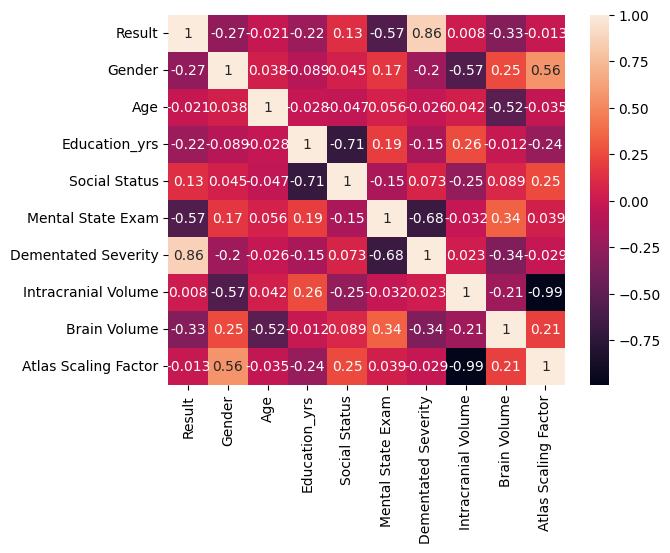

In [2]:
corr_df = df.drop(['0.0', '0.5', '1.0', '2.0'], axis=1)
corr = corr_df.corr()
sns.heatmap(corr, annot=True)

(Exlcuding relations between result and demented severity.)

Highest Correlation of Dementated = Mental State Exam (-0.57), Brain Volume (-0.33)
Highest Correlation of Dementated Severity = Mental State Exam (-0.68), Brain Volume (-0.34)

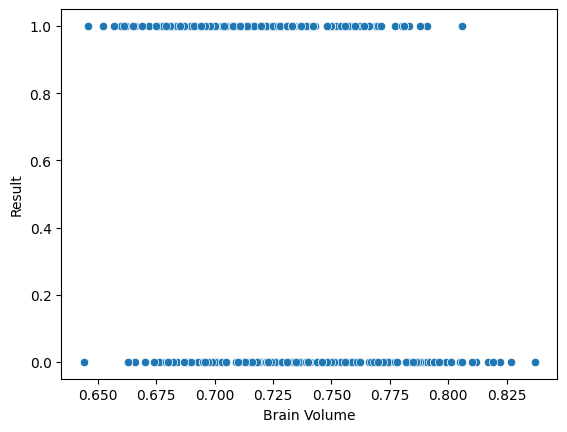

In [3]:
r_bv_plot=sns.scatterplot(x='Brain Volume', y='Result', data=df)

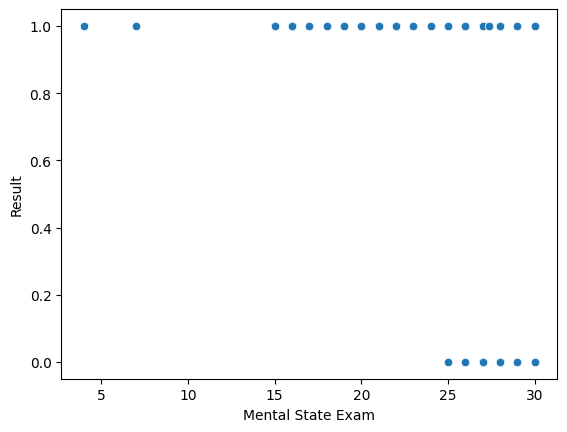

In [4]:
r_mse_plot=sns.scatterplot(x='Mental State Exam', y='Result', data=df)

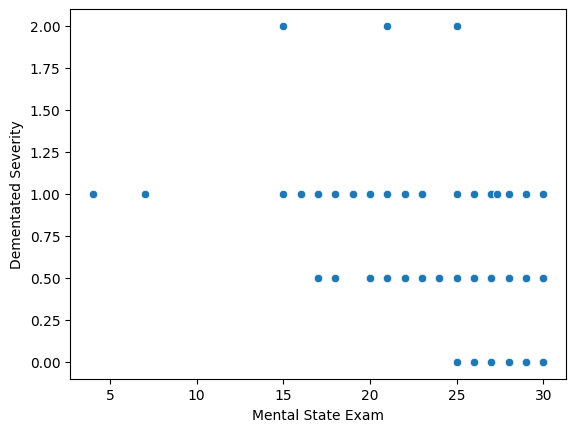

In [5]:
ds_mse_plot=sns.scatterplot(x='Mental State Exam', y='Dementated Severity', data=df)

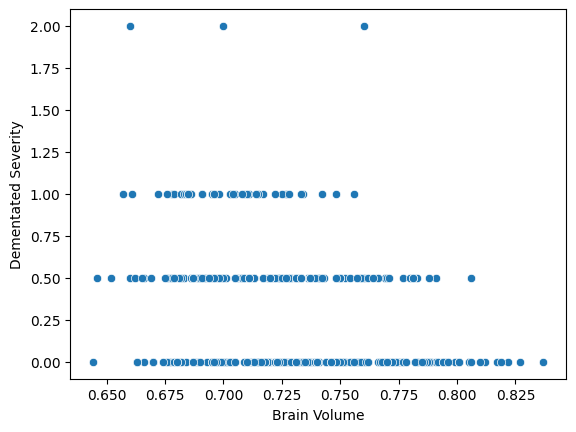

In [6]:
ds_bv_plot=sns.scatterplot(x='Brain Volume', y='Dementated Severity', data=df)

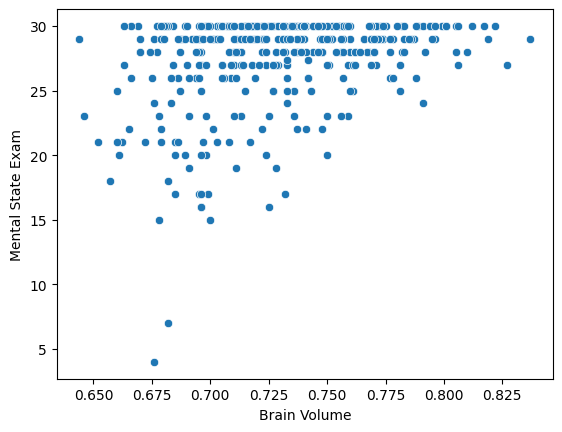

In [7]:
mse_bv_plot=sns.scatterplot(x='Brain Volume', y='Mental State Exam', data=df)

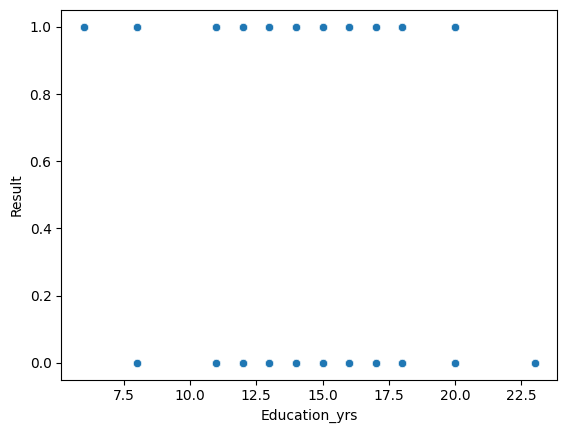

In [8]:
r_mse_plot=sns.scatterplot(x='Education_yrs', y='Result', data=df)

We can see that for education, mental exam, and brain volume, the higher the amount of these values the the less likely patients are to be demented. We not only see this with simply having dementia but how it also relates similarly to the severity of demensia. As one might assume, larger the brain the higher scores on the mental state exam. Showing correlation between the two columns as well.

# Model 1 - Simple Multi-Linear Regression

In [37]:
from sklearn.preprocessing import StandardScaler
X = corr_df.drop(['Result', 'Dementated Severity'], axis =1)
y = corr_df['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.26, random_state=40)

In [38]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = regression.predict(X_test)
y_pred

array([ 1.13082277e+00,  2.01078642e+00,  1.78789338e-02,  1.31761682e+00,
        3.98306636e-01,  6.58410156e-01,  1.45230555e-01,  3.72960159e-01,
        2.64580002e-01,  4.00832490e-01,  5.08889297e-01,  9.85450488e-01,
        6.19326181e-01,  3.45770453e-01,  3.52388139e-01,  2.62296962e-01,
        2.91394677e-01,  2.94256921e-01,  3.94146087e-01,  6.64970159e-01,
        1.74465919e-01,  2.98607428e-01,  8.81940208e-01,  2.65721656e-01,
        7.55110695e-01,  3.93556788e-01,  5.78361993e-01,  2.67263865e-01,
        5.95983315e-02,  8.06833904e-01,  4.15327445e-01,  6.97245525e-01,
        3.90403993e-01,  5.52713535e-01,  3.41764769e-01,  2.08034902e-01,
        1.97599618e-01,  3.38232393e-01,  1.83269610e-01,  4.09196215e-01,
        4.19858109e-01,  3.25849409e-01,  2.83319166e-01,  4.55193511e-01,
        3.89912084e-01,  3.43717711e-01,  8.09172064e-02,  1.26395295e-01,
        3.07389423e-01,  2.13400403e-01,  7.32786545e-01,  5.85903129e-01,
        1.29065294e+00,  

In [40]:
accuracy_score_model_1 = regression.score(X_test, y_test)
accuracy_score_model_1

0.3263134707618349

# Model 2 - Split up Dementia Severity + Multi-Linear Regression

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = df.drop(['Dementated Severity', '0.0', '0.5', '1.0', '2.0'], axis=1) 
y = df['0.0'] # Demented State you want to predict

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=40)

In [14]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = regression.predict(X_test)
y_pred

array([ 5.20106621e-01,  1.01060561e+00,  4.52329883e-02,  5.29427489e-01,
       -7.32017925e-02,  6.35329314e-02,  3.64136517e-02, -9.88179983e-02,
        5.18805360e-02, -7.73247517e-03,  2.09935686e-01,  4.07865459e-01,
        5.23939995e-02,  3.54425620e-02,  6.48985298e-02,  7.74416079e-02,
        8.76928443e-02,  1.24168065e-01,  6.61621671e-02,  2.45243158e-01,
        1.86105945e-01, -3.66964595e-02,  3.57180271e-01,  1.32613001e-01,
        1.35666482e-01,  2.58076370e-02,  1.15686163e-01,  9.33603521e-02,
        1.00253291e-02,  3.95213322e-01, -8.68342632e-02,  1.21192525e-01,
       -5.13937562e-02, -4.94666047e-05,  9.89259040e-02, -1.11251374e-01,
        1.74613080e-01, -5.13693711e-02, -1.18654213e-01,  1.22124125e-01,
        1.96720571e-01,  3.36273684e-02,  7.13352521e-02, -5.68971659e-02,
        1.85977853e-02,  8.90231092e-02, -8.22370691e-03, -9.92188600e-02,
        4.06888186e-02,  9.24502639e-02,  1.71620006e-01,  2.00025497e-01,
        5.08390769e-01,  

In [16]:
accuracy_score_model_2 = regression.score(X_test, y_test)
accuracy_score_model_2

0.4026797565425695

### First Accuracy Values
0.0 - 1.0 |
0.5 - 0.596 |
1.0 - 0.402 |
2.0 - 0.0 

# Over-Sampling

In [17]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=40)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [18]:
model = LinearRegression()
model.fit(X_resampled, y_resampled)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)

In [20]:
accuracy_score_model_final = model.score(X_resampled,y_resampled)
accuracy_score_model_final

0.563912036494896

### Over-Sampled Values
0.0 - 1.0 |
0.5 - 0.785 |
1.0 - 0.566 |
2.0 - 0.817 

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score

print(type(y_test))
print(type(y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print(fpr, tpr)
auc

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
[0.         0.         0.         0.02325581 0.02325581 0.05813953
 0.05813953 0.08139535 0.08139535 0.18604651 0.18604651 0.27906977
 0.27906977 1.        ] [0.         0.06666667 0.26666667 0.26666667 0.6        0.6
 0.66666667 0.66666667 0.8        0.8        0.93333333 0.93333333
 1.         1.        ]


0.9341085271317828